**DataSet de Fallecidos por COVID-19 - [Ministerio de Salud - MINSA]**                             link: https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa/resource/4b7636f3-5f0c-4404-8526




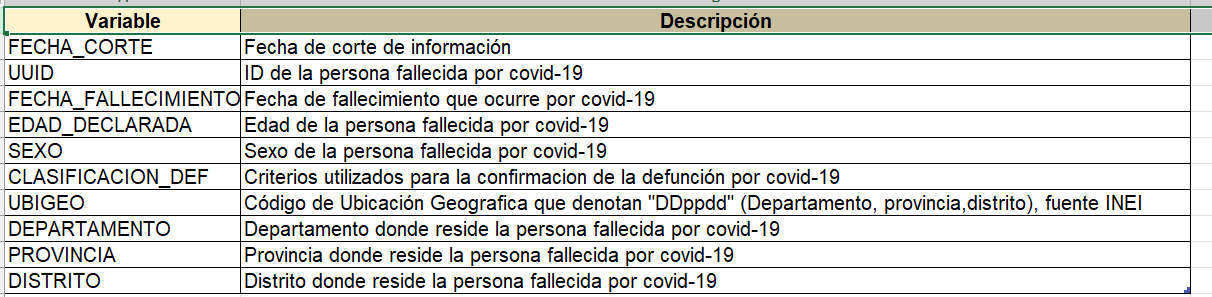

## Data

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
link='/content/drive/MyDrive/Dataset Practicas/portafolio /fallecidos_covid (1).csv'
data=pd.read_csv(link,encoding='utf-8',sep=';')
data.head()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20240317,20220219,63,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203506.0
1,20240317,20210529,74,MASCULINO,Criterio virológico,TUMBES,TUMBES,TUMBES,240101.0,203532.0
2,20240317,20210623,72,FEMENINO,Criterio SINADEF,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203584.0
3,20240317,20210824,85,MASCULINO,Criterio investigación Epidemiológica,TUMBES,TUMBES,TUMBES,240101.0,212541.0
4,20240317,20210627,46,MASCULINO,Criterio virológico,TACNA,TACNA,ALTO DE LA ALIANZA,230102.0,203665.0


## Inspeccion de datos

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220918 entries, 0 to 220917
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          220918 non-null  int64  
 1   FECHA_FALLECIMIENTO  220918 non-null  int64  
 2   EDAD_DECLARADA       220918 non-null  int64  
 3   SEXO                 220918 non-null  object 
 4   CLASIFICACION_DEF    220918 non-null  object 
 5   DEPARTAMENTO         220918 non-null  object 
 6   PROVINCIA            220913 non-null  object 
 7   DISTRITO             220913 non-null  object 
 8   UBIGEO               220913 non-null  float64
 9   UUID                 218449 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 16.9+ MB


In [74]:
data.describe()

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,UBIGEO,UUID
count,220918.0,2.209180e+05,220918.000000,220913.000000,2.184490e+05
mean,20240317.0,2.020718e+07,66.361786,134080.041537,2.536941e+07
std,0.0,6.532271e+03,15.879204,51119.520800,1.426178e+07
min,20240317.0,2.020030e+07,0.000000,10101.000000,1.200000e+01
25%,20240317.0,2.020073e+07,57.000000,110210.000000,1.078586e+07
50%,20240317.0,2.021021e+07,68.000000,150110.000000,3.621813e+07
75%,20240317.0,2.021043e+07,78.000000,150140.000000,3.664122e+07
max,20240317.0,2.024030e+07,114.000000,250401.000000,4.200498e+07


## Datos fantantes

In [75]:
valores_nulos=data.isnull().sum()
valores_nulos

,0
FECHA_CORTE,0
FECHA_FALLECIMIENTO,0
EDAD_DECLARADA,0
SEXO,0
CLASIFICACION_DEF,0
DEPARTAMENTO,0
PROVINCIA,5
DISTRITO,5
UBIGEO,5
UUID,2469


In [76]:
data.dropna(subset=['PROVINCIA','DISTRITO','UBIGEO'],inplace=True)

## Limpieza y transformacion

In [77]:
#Duplicados en la columna (UUID)
data['UUID'].duplicated().sum()

np.int64(2555)

In [78]:
data.drop_duplicates(subset='UUID',keep='first',inplace=True)

In [79]:
# separar de la columna FECHA_FALLECIMIENTO

In [80]:
data['FECHA_FALLECIMIENTO']=pd.to_datetime(data
    ['FECHA_FALLECIMIENTO'].astype(str),
    errors='coerce')

In [81]:
data['ANIO_FALLECIMIENTO'] = data['FECHA_FALLECIMIENTO'].dt.year
data['MES_FALLECIMIENTO']  = data['FECHA_FALLECIMIENTO'].dt.month
data['DIA_FALLECIMIENTO']  = data['FECHA_FALLECIMIENTO'].dt.day

In [82]:
data.drop('FECHA_FALLECIMIENTO',axis=1,inplace=True)

## visualizacion

In [83]:
sexo_tiempo = (
    data
    .groupby(['ANIO_FALLECIMIENTO','SEXO'])
    .size()
)

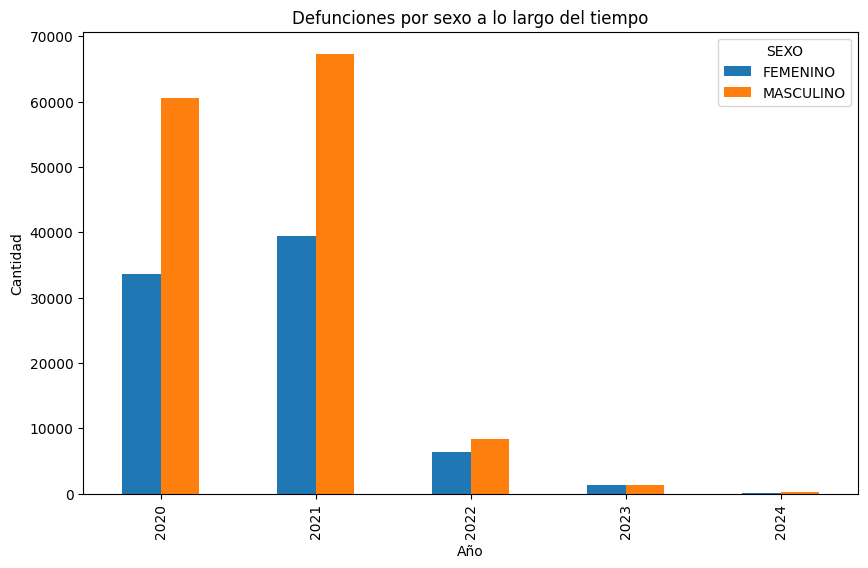

In [93]:
sexo_tiempo.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Defunciones por sexo a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()


In [69]:
data.columns

Index(['FECHA_CORTE', 'EDAD_DECLARADA', 'SEXO', 'CLASIFICACION_DEF',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'UUID',
       'ANIO_FALLECIMIENTO', 'MES_FALLECIMIENTO', 'DIA_FALLECIMIENTO'],
      dtype='object')

In [86]:
top_departamento= (
    data.
    groupby('DEPARTAMENTO').
    size().
    sort_values(ascending=False).
    head(5)
)

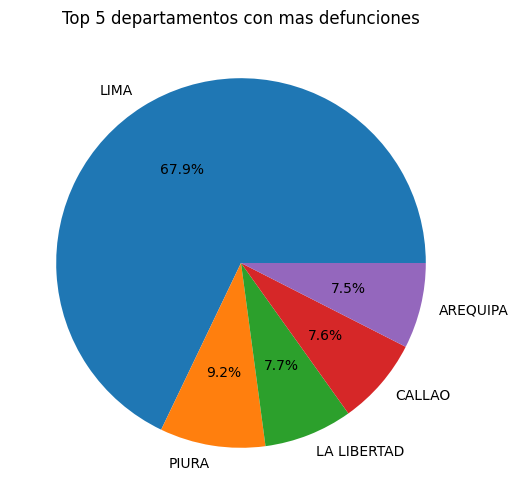

In [92]:
# Grafico de pastel
top_departamento.plot(kind='pie',figsize=(10,6),autopct='%1.1f%%')
plt.title('Top 5 departamentos con mas defunciones')
plt.show()

In [ ]:
## Grafico linear de mes y casos

In [120]:
## Grafico linear del anio 2021 segun genero fallecidos
tiempo_mes_anio2021 = (
    data[data['ANIO_FALLECIMIENTO'] == 2021]
    .groupby(['MES_FALLECIMIENTO', 'SEXO'])
    .size()
    .unstack()
)

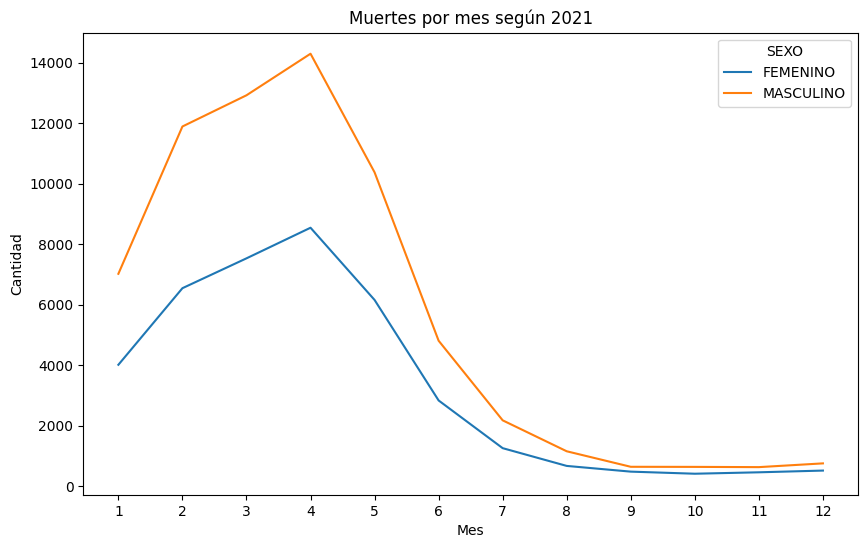

In [123]:
tiempo_mes_anio2021.plot(kind='line', figsize=(10,6))
plt.title('Muertes por mes según 2021')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(range(1,13))
plt.show()

In [125]:

heat = (
    data
    .groupby(['ANIO_FALLECIMIENTO','MES_FALLECIMIENTO'])
    .size()
    .unstack()
)